In [11]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

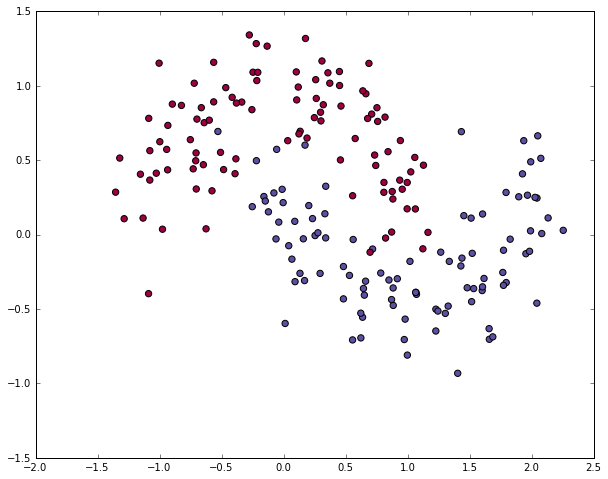

In [12]:
np.random.seed(0)
X,y = sklearn.datasets.make_moons(200, noise = 0.2)
plt.scatter(X[:,0],X[:,1],s = 40, c = y, cmap = plt.cm.Spectral)

In [13]:
X

array([[ 0.74346118,  0.46465633],
       [ 1.65755662, -0.63203157],
       [-0.15878875,  0.25584465],
       [-1.088752  , -0.39694315],
       [ 1.768052  , -0.25443213],
       [ 1.95416454, -0.12850579],
       [ 0.93694537,  0.36597075],
       [ 0.88446589, -0.47595401],
       [ 0.80950246,  0.3505231 ],
       [ 1.2278091 , -0.64785108],
       [-0.38454276,  0.50916381],
       [ 0.09252135, -0.31618454],
       [ 1.79531658, -0.32235591],
       [ 1.43861749, -0.15796611],
       [-0.82364866,  0.86822754],
       [ 0.99633397,  0.1731019 ],
       [ 0.66388701,  0.94659669],
       [ 0.13229471, -0.26032619],
       [ 0.2482245 ,  0.7860477 ],
       [-1.00392102,  1.15207238],
       [ 2.08208438,  0.00715606],
       [ 0.87081342, -0.4366643 ],
       [ 0.37268327,  1.01743002],
       [ 1.26735927, -0.11813675],
       [-0.13270154,  1.26653562],
       [ 0.20331   ,  0.19519454],
       [ 1.98373996, -0.11222315],
       [ 1.82749513, -0.03085446],
       [-0.03857867,

In [14]:
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [15]:
#### It is not linear seperable. So, can not use a logistic regression. But, still try logistic regression first
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [16]:
aa = np.array([[1,2],[3,4]])
bb = np.array([[3,4],[5,6]])
np.c_[aa.ravel(),bb.ravel()]

array([[1, 3],
       [2, 4],
       [3, 5],
       [4, 6]])

In [17]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

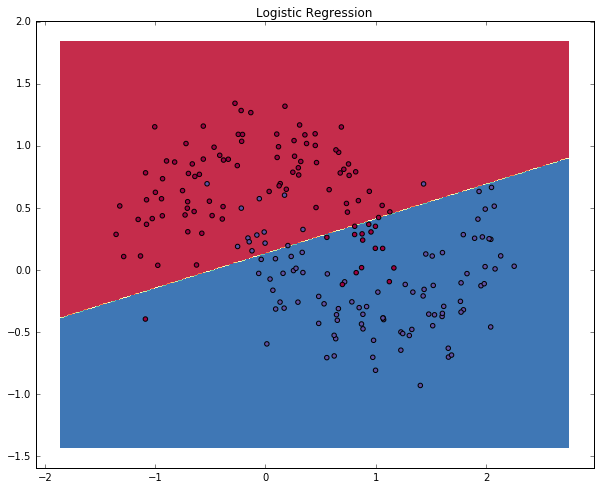

In [18]:
plot_decision_boundary(lambda x:clf.predict(x))
plt.title("Logistic Regression")

In [19]:
num_examples = len(X)#trianing set size
nn_input_dim = 2 #input layer dimension 
nn_output_dim = 2 # output layer dimension

In [20]:
epsilon = 0.01 #learning rate for grddient descent
reg_lambda = 0.01 # regularization strengh

In [21]:
#Helper function: evaluate total loss on the dataset
def calculate_loss(model):
    W1,b1,W2,b2 = model['W1'], model['b1'], model['W2'], model['b2']
    #Forward propagation to calcualte the predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_score = np.exp(z2)
    #soft max expression: n x 2
    probs = exp_score / np.sum(exp_score, axis = 1, keepdims = True)
    #Calculating the loss
    #select the probability corresponding to a presponse with 1
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)
    #Add regularization term to the loss function
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [22]:
#Helper function to predict an output, using forward propagation
def predict(model, x):
    W1,b1,W2,b2 = model['W1'], model['b1'], model['W2'], model['b2']
    #Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_score = np.exp(z2)
    probs = exp_score / np.sum(exp_score, axis = 1, keepdims = True)
    return np.argmax(probs, axis = 1)

In [23]:
xrange(5)

xrange(5)

In [24]:
a = np.array([[1,2,3],[3,5,6],[3,7,5]])
b = np.array([2,3,4])
print (a).dot(b)
a*b

[20 45 47]


array([[ 2,  6, 12],
       [ 6, 15, 24],
       [ 6, 21, 20]])

In [25]:
#Function learns parameters for the neural network and return the model
#nn_hdim: number of nodes in hidden layer: (hiddent dimension)
#num_passes: Number of passes through the training dat for gradient descent
#print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes = 20000, print_loss = False):
    #Initialize the parameters to random values, We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1,nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    #a dictionary
    model = {}
    
    #Gradient descent for each batch
    for i in xrange(0, num_passes):
        #Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores/np.sum(exp_scores,axis=1, keepdims=True)
        
        #Backpropagation
        delta3 = probs
        #if y == 0, prob - 0 = prob
        delta3[range(num_examples),y] -= 1
        dW2  = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis = 0, keepdims = True)
        delta2 = delta3.dot(W2.T)*(1 - np.power(a1,2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis = 0)
        
        #Add regularizaton terms (b1 and b2 do not have regularization terms)
        dW2 += reg_lambda*W2
        dW1 += reg_lambda*W1
        
        #Gradient descent parameter update
        
        W1 += -epsilon*dW1
        b1 += -epsilon*db1
        W2 += -epsilon*dW2
        b2 += -epsilon*db2
        
        #Assign new parameters to the model
        model = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
        
        #Optionally print the loss
        #This is expensive 
        
        if print_loss and i % 1000 == 0:
            print "Loss after iteration %i:%f" % (i, calculate_loss(model))
        
        
    return model 
    
    

In [26]:
############# Use this network with 3 nodes in the hidden layer
model = build_model(3, print_loss = True)

Loss after iteration 0:0.432387
Loss after iteration 1000:0.068947
Loss after iteration 2000:0.068918
Loss after iteration 3000:0.070752
Loss after iteration 4000:0.070748
Loss after iteration 5000:0.070751
Loss after iteration 6000:0.070754
Loss after iteration 7000:0.070756
Loss after iteration 8000:0.070757
Loss after iteration 9000:0.070758
Loss after iteration 10000:0.070758
Loss after iteration 11000:0.070758
Loss after iteration 12000:0.070758
Loss after iteration 13000:0.070758
Loss after iteration 14000:0.070758
Loss after iteration 15000:0.070758
Loss after iteration 16000:0.070758
Loss after iteration 17000:0.070758
Loss after iteration 18000:0.070758
Loss after iteration 19000:0.070758


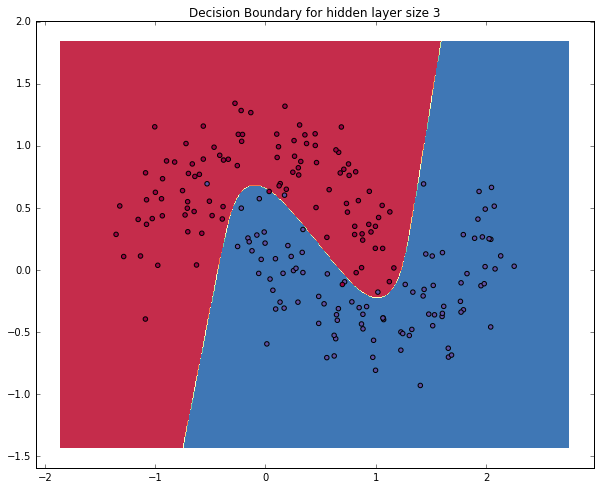

In [27]:
plot_decision_boundary(lambda x:predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

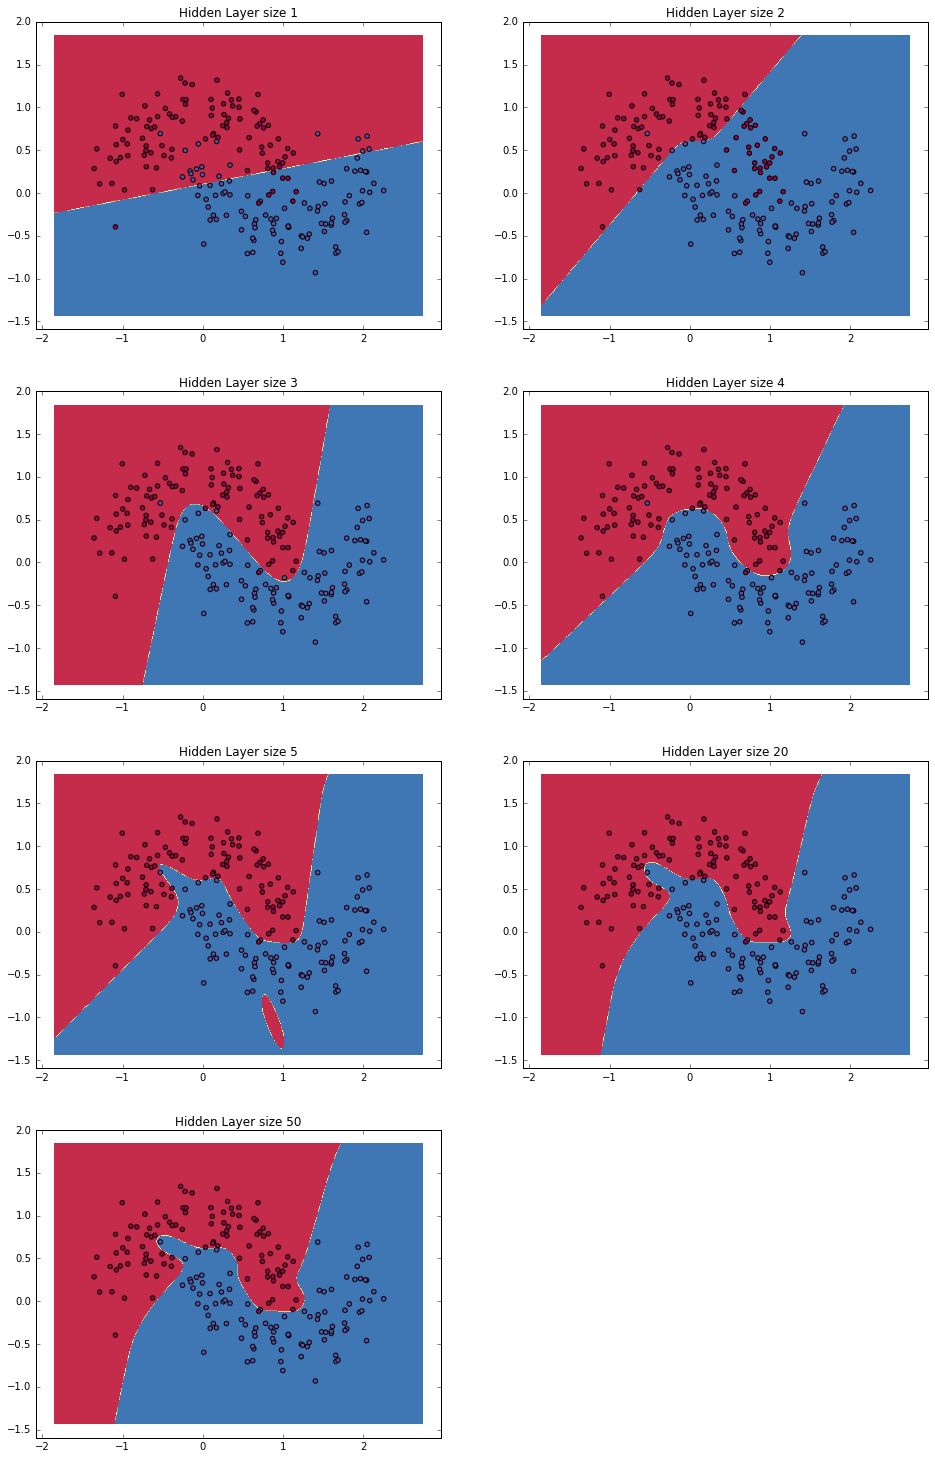

In [28]:
############# Try different figure size
plt.figure(figsize = (16,32))
hidden_layer_dimensions = [1,2,3,4,5,20,50]

for i, nn_hdim in enumerate(hidden_layer_dimensions):
    #print i, nn_hdim
    plt.subplot(5,2,i + 1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x : predict(model, x))
plt.show()